**English Fake News Detection Dataset**

https://www.kaggle.com/datasets/miadul/english-fake-news-detection-dataset/data

📰 English Fake News Detection Dataset (Synthetic, 2,212 rows)
📌 Dataset Summary
This is a synthetically generated but realistic dataset created for the purpose of training and evaluating machine learning models to detect fake vs real news articles in English. The dataset mimics real-world news reporting formats and includes fabricated content with varied sources and tones.

📊 Dataset Size
Rows (News Articles): 2,212
Columns: 5
news_id: Unique identifier for each news article
headline: The title or headline of the article
body_text: The main content/body of the news
source: The source or publisher of the article (e.g., BBC, Unknown News)
* label: Ground truth label — either "Fake" or "Real"
📁 Column Descriptions
Column Name	Type	Description
news_id	Integer	Unique ID for each article
headline	String	A short headline summarizing the news
body_text	String	The full body or main content of the article
source	String	The news publisher/source name (e.g., BBC, CNN, Unknown News)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

df = pd.read_csv('/content/english_fake_news_2212.csv')
df.head()

,news_id,headline,body_text,source,label
0,1,Global economy faces recession,The Prime Minister attended the inauguration c...,CNN,Real
1,2,"Earthquake hits Chittagong, panic spreads",Government sources state that an official anno...,Daily Star,Real
2,3,Breakthrough in Bangladesh's tech industry,Local administration has visited the spot for ...,BBC,Fake
3,4,Dengue situation worsens in the country,The Prime Minister attended the inauguration c...,BBC,Fake
4,5,New virus outbreak sparks fear,Government sources state that an official anno...,Reuters,Real


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news_id    2212 non-null   int64 
 1   headline   2212 non-null   object
 2   body_text  2212 non-null   object
 3   source     2212 non-null   object
 4   label      2212 non-null   object
dtypes: int64(1), object(4)
memory usage: 86.5+ KB


In [5]:
df.isna().sum()

,0
news_id,0
headline,0
body_text,0
source,0
label,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['source'].value_counts()

,count
source,
CNN,476
Reuters,467
BBC,436
Unknown News,423
Daily Star,410


In [8]:
df['label'].value_counts() #dataset balanceado

,count
label,
Fake,1110
Real,1102


In [9]:
df.drop(columns=['source','news_id'],inplace=True)

In [10]:
nltk.download('stopwords')
stopwords_en = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

vectorizer = TfidfVectorizer(stop_words=stopwords_en)
preprocessor = ColumnTransformer(
    transformers=[
        ("tfidf_headline", TfidfVectorizer(), "headline"),
        ("tfidf_body_text", TfidfVectorizer(), "body_text")
    ]
)
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)
scaler = LabelEncoder().fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

**kNN**

k: 1 , acuracia: 0.4864457831325301
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       330
           1       0.49      0.47      0.48       334

    accuracy                           0.49       664
   macro avg       0.49      0.49      0.49       664
weighted avg       0.49      0.49      0.49       664



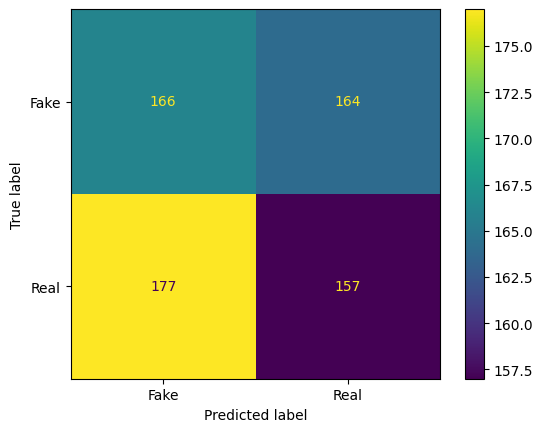

k: 2 , acuracia: 0.5060240963855421
              precision    recall  f1-score   support

           0       0.50      0.71      0.59       330
           1       0.52      0.30      0.38       334

    accuracy                           0.51       664
   macro avg       0.51      0.51      0.49       664
weighted avg       0.51      0.51      0.48       664



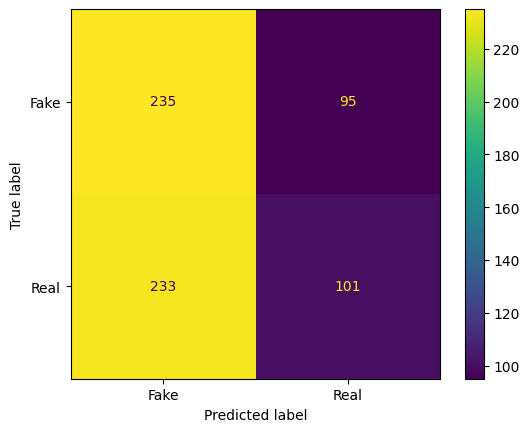

k: 3 , acuracia: 0.5060240963855421
              precision    recall  f1-score   support

           0       0.50      0.51      0.51       330
           1       0.51      0.50      0.51       334

    accuracy                           0.51       664
   macro avg       0.51      0.51      0.51       664
weighted avg       0.51      0.51      0.51       664



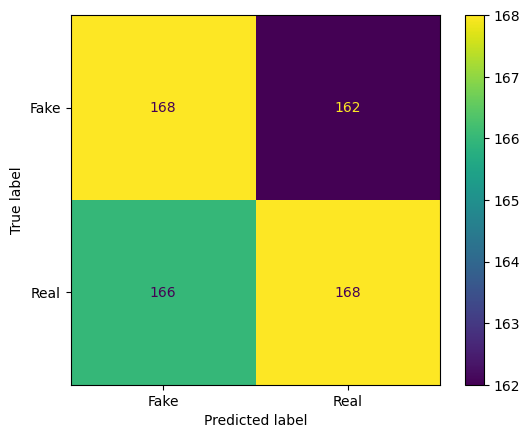

k: 4 , acuracia: 0.5210843373493976
              precision    recall  f1-score   support

           0       0.51      0.67      0.58       330
           1       0.53      0.37      0.44       334

    accuracy                           0.52       664
   macro avg       0.52      0.52      0.51       664
weighted avg       0.52      0.52      0.51       664



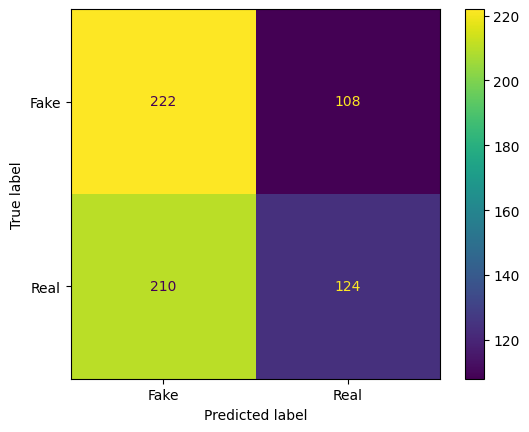

k: 5 , acuracia: 0.4924698795180723
              precision    recall  f1-score   support

           0       0.49      0.48      0.48       330
           1       0.50      0.51      0.50       334

    accuracy                           0.49       664
   macro avg       0.49      0.49      0.49       664
weighted avg       0.49      0.49      0.49       664



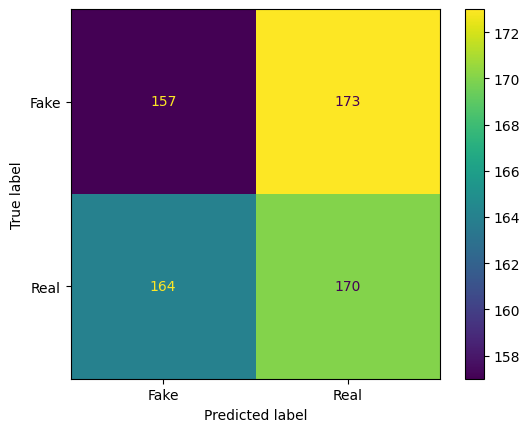

k: 6 , acuracia: 0.5421686746987951
              precision    recall  f1-score   support

           0       0.53      0.71      0.61       330
           1       0.57      0.38      0.46       334

    accuracy                           0.54       664
   macro avg       0.55      0.54      0.53       664
weighted avg       0.55      0.54      0.53       664



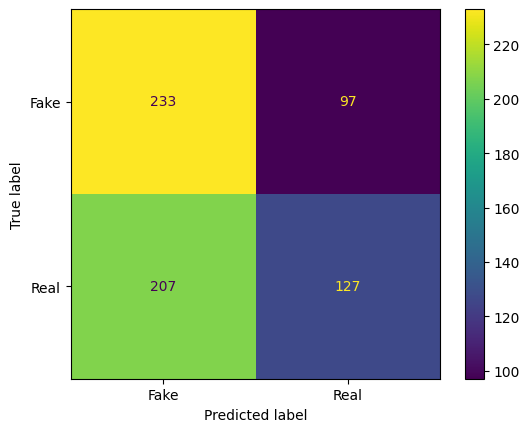

k: 7 , acuracia: 0.5316265060240963
              precision    recall  f1-score   support

           0       0.53      0.55      0.54       330
           1       0.54      0.51      0.53       334

    accuracy                           0.53       664
   macro avg       0.53      0.53      0.53       664
weighted avg       0.53      0.53      0.53       664



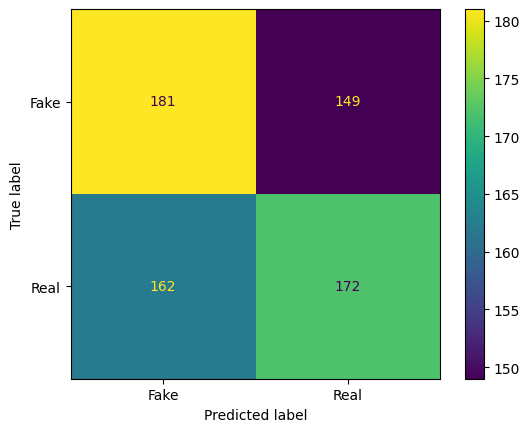

k: 8 , acuracia: 0.5331325301204819
              precision    recall  f1-score   support

           0       0.52      0.68      0.59       330
           1       0.55      0.39      0.46       334

    accuracy                           0.53       664
   macro avg       0.54      0.53      0.52       664
weighted avg       0.54      0.53      0.52       664



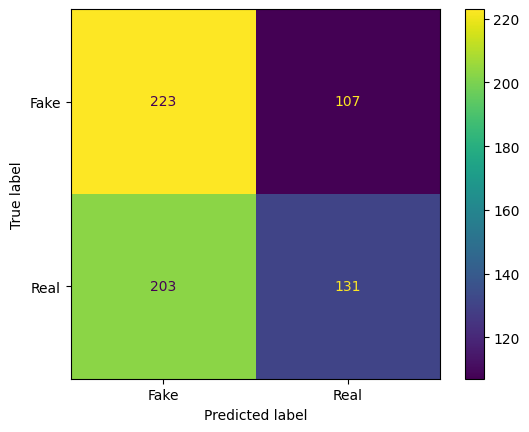

k: 9 , acuracia: 0.5256024096385542
              precision    recall  f1-score   support

           0       0.52      0.48      0.50       330
           1       0.53      0.57      0.55       334

    accuracy                           0.53       664
   macro avg       0.53      0.53      0.52       664
weighted avg       0.53      0.53      0.52       664



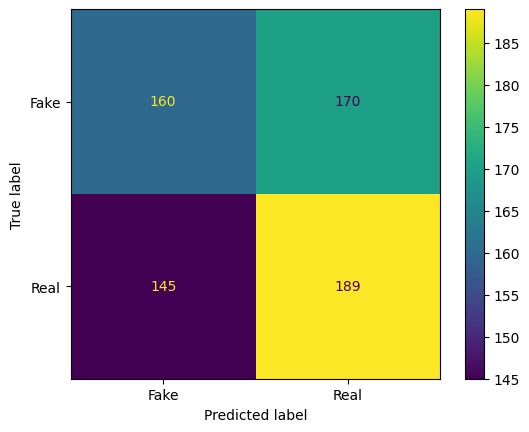

k: 10 , acuracia: 0.5286144578313253
              precision    recall  f1-score   support

           0       0.52      0.62      0.57       330
           1       0.54      0.44      0.48       334

    accuracy                           0.53       664
   macro avg       0.53      0.53      0.52       664
weighted avg       0.53      0.53      0.52       664



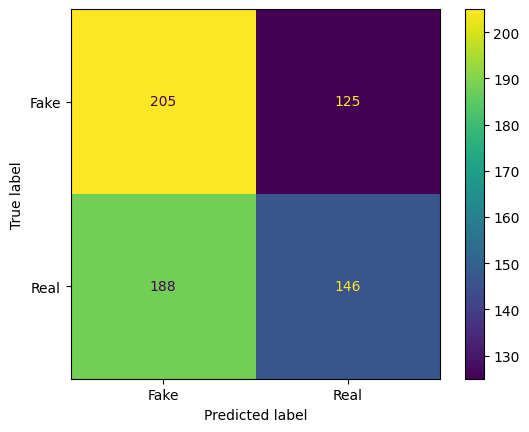

Melhor k: 6


In [13]:
k_valores = np.arange(1, 11)
acc = []
for k in k_valores:
  knn = KNeighborsClassifier(n_neighbors=k, metric='cityblock') # 'euclidean', 'cityblock', 'chebyshev'
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  print(f'k: {k} , acuracia: {accuracy_score(y_test,y_pred)}')
  print(classification_report(y_test, y_pred))
  acc.append(accuracy_score(y_test,y_pred))
  cm = confusion_matrix(y_test,y_pred)
  cmd = ConfusionMatrixDisplay(cm, display_labels=list(df['label'].value_counts().index))
  # plota a matriz de confusão
  cmd.plot()
  plt.show()
acc = np.array(acc)
print(f'Melhor k: {k_valores[acc.argmax()]}')

**Decision Tree**

Decision Tree Accuracy: 0.516566265060241
              precision    recall  f1-score   support

           0       0.51      0.57      0.54       330
           1       0.52      0.47      0.49       334

    accuracy                           0.52       664
   macro avg       0.52      0.52      0.52       664
weighted avg       0.52      0.52      0.52       664



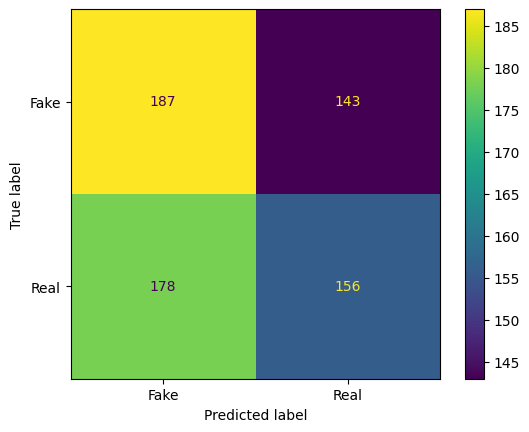

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test,y_pred_dt)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(df['label'].value_counts().index))
# plota a matriz de confusão
cmd.plot()
plt.show()

**Naive Bayes**

Naive Bayes Accuracy: 0.4924698795180723
              precision    recall  f1-score   support

           0       0.49      0.57      0.53       330
           1       0.49      0.42      0.45       334

    accuracy                           0.49       664
   macro avg       0.49      0.49      0.49       664
weighted avg       0.49      0.49      0.49       664



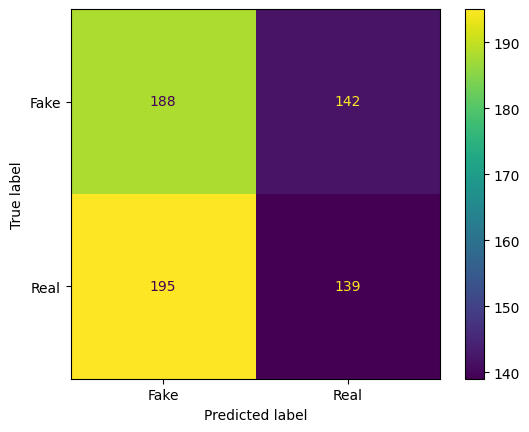

In [15]:
nb = GaussianNB()
nb.fit(X_train.toarray(), y_train)
y_pred_nb = nb.predict(X_test.toarray())
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
cm = confusion_matrix(y_test,y_pred_nb)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(df['label'].value_counts().index))
# plota a matriz de confusão
cmd.plot()
plt.show()

**Logistic Regression**

Logistic Regression Accuracy: 0.49096385542168675
              precision    recall  f1-score   support

           0       0.49      0.54      0.51       330
           1       0.49      0.45      0.47       334

    accuracy                           0.49       664
   macro avg       0.49      0.49      0.49       664
weighted avg       0.49      0.49      0.49       664



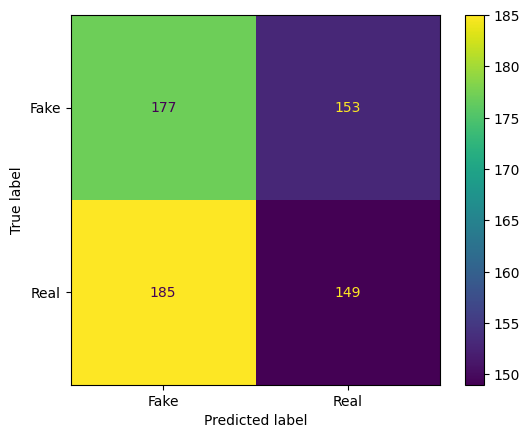

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
cm = confusion_matrix(y_test,y_pred_lr)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(df['label'].value_counts().index))
# plota a matriz de confusão
cmd.plot()
plt.show()

In [ ]:
Best results: RandomForest